# Problem 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
A=np.array([[3,0.5],[0.5,1]])
m=np.array([[1],[2]])

In [104]:
def st(m,q):
    w=np.zeros(m.shape)
    for i in range(len(w)):
        if m[i]>q:
            w[i]=m[i]-q
        elif np.abs(m[i])<q:
            w[i]=0
        else:
            w[i]=m[i]+q
    return w
            

In [105]:

L=np.max(np.linalg.eig(2*A)[0])
for lam in [2,4,6]:
    w=np.array([[3],[1]])
    w_list=w.copy().T
    for i in range(100):
        grad=2*np.dot(A,w-m)
        w=st(w-grad/L,lam/L)
        w_list=np.vstack((w_list,w.T))
    globals()['w'+str(int(lam/2))]=w_list
    w_list=w_list-w_list[100]
    perf=[]
    for i in range(100):
        perf.append(np.dot(w_list[i],w_list[i].T))
    globals()['perf'+str(int(lam/2))]=perf

[]

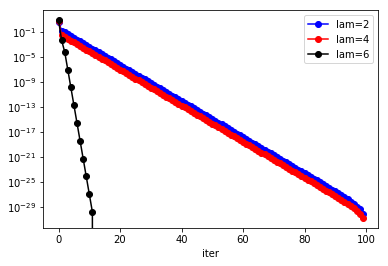

In [106]:
#1. show the result of PG
plt.plot(perf1,'bo-',label='lam=2')
plt.plot(perf2,'ro-',label='lam=4')
plt.plot(perf3,'ko-',label='lam=6')
plt.xlabel('iter')
plt.legend()
plt.semilogy()

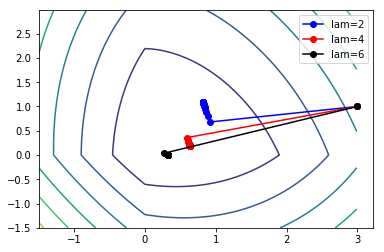

In [107]:
#2. trajectories
x_1=np.arange(-1.5,3,0.01)
x_2=np.arange(-1.5,3,0.02)
X1,X2=np.mgrid[-1.5:3:0.01,-1.5:3:0.02]
f=np.zeros((len(x_1),len(x_2)))
for i in range(len(x_1)):
    for j in range(len(x_2)):
        inr=np.vstack([x_1[i],x_2[j]])
        f[i,j]=np.dot(np.dot((inr-m).T, A), (inr- m)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))
plt.contour(X1,X2,f)
plt.plot(w1[:,0],w1[:,1],'bo-',label='lam=2')
plt.plot(w2[:,0],w2[:,1],'ro-',label='lam=4')
plt.plot(w3[:,0],w3[:,1],'ko-',label='lam=6')
plt.legend()